In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('winequality-red.csv',sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.unique() # We have only 6 types of quality values

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.shape

(1599, 12)

In [6]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}

In [7]:
df.loc[:,'quality'] = df.quality.map(quality_mapping)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [9]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

#### Dividing the data into two parts. This dataset has 1599 samples. We keep 1000 samples for training and 599 as a separate set

In [10]:
#shuffling the dataframe and reseting the index

df = df.sample(frac = 1).reset_index(drop=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.4,0.26,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,3
1,12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,3
2,10.9,0.53,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.7,3
3,8.8,0.30,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,3
4,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,3


In [12]:
# top 1000 rows are selected
# for training
df_train = df.head(1000)

In [13]:
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

#### Decision Tree Model 

In [14]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics



In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [17]:
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
#test the accuracy of this model on the training set and the test set

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

In [19]:
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
print(train_accuracy)

0.618


In [20]:
# generate predictions on the test set

test_predictions = clf.predict(df_test[cols])

In [21]:
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions)

print(test_accuracy)

0.5475792988313857


In [22]:
# Training the Decision Tree model with max_depth = 7

clf2 = tree.DecisionTreeClassifier(max_depth = 7)

clf2.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:

# generate predictions on the training set
train_predictions_2 = clf2.predict(df_train[cols])

train_accuracy2 = metrics.accuracy_score(
df_train.quality, train_predictions_2
)
print(train_accuracy2)

test_predictions_2 = clf2.predict(df_test[cols])

test_accuracy2 = metrics.accuracy_score(
df_test.quality, test_predictions_2)

print(test_accuracy2)

0.77
0.5609348914858097


### Calculating the accuracies for different values of max_depth

In [24]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [25]:
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [26]:
#initializing the list to store the accuracies
#for train and test data
#starting with 50% accuracy

train_accuracies = [0.5]
test_accuracies = [0.5]



In [27]:
# columns/features for training
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [28]:
for d in range(1,25):
    # init the model
    dt = tree.DecisionTreeClassifier(max_depth=d)
    
    #fit the model oin given features
    dt.fit(df_train[cols],df_train.quality)
    
    
    #create train and test predictions
    train_preds = dt.predict(df_train[cols])
    test_preds = dt.predict(df_test[cols])
    
    #calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_preds)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_preds)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    


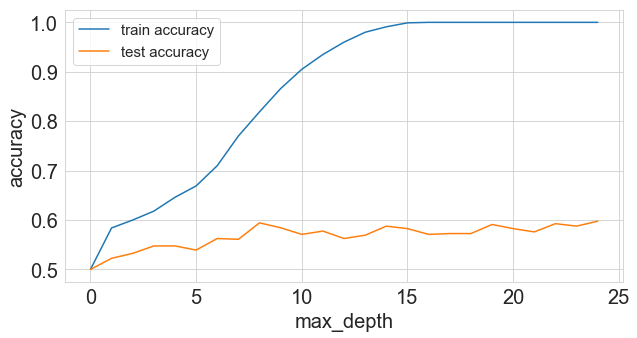

In [30]:
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train accuracy')
plt.plot(test_accuracies, label = 'test accuracy')
plt.legend(loc = 'upper left', prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()



#### best score for test data is obtained when max_depth has a value of 8.

#### As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.

### This is overfitting

### Distribution of Labels

Text(0, 0.5, 'count')

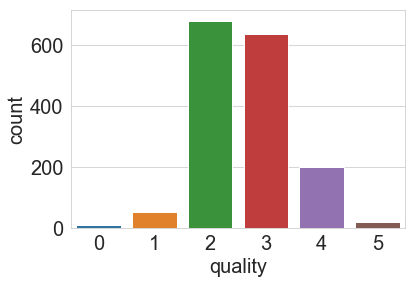

In [31]:
b = sns.countplot(x='quality',data = df)
b.set_xlabel('quality',fontsize = 20)
b.set_ylabel('count',fontsize = 20)

In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection